<a href="https://colab.research.google.com/github/djurjo/DABI/blob/main/PSO-project/iterative_swarn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import random

In [56]:
#Basic, and not really well donde bird that flies o (-5, 5)x(-5,5) \in R²
class Bird(object):
    def __init__(self, x_int = (-5, 5)):
        self._x = x_int
        
        self.pos = random.uniform(x_int[0], x_int[1])
        self._best = self.pos
        self._vector = random.uniform(x_int[0], x_int[1])
        
        self.r = random.random()
        self.s = random.random()
        
    def update_v(self, glob, inert, cog, soc):
        v1 = inert * self._vector + cog * self.r * (self._best - self.pos) + soc *self.s * (glob - self.pos)
        #v2 = inert * self._vector[1] + cog * self.r * (self._best[1] - self.pos[1]) + soc *self.s * (glob[1] - self.pos[1])
        self._vector = v1
        
    def update_p(self, n_pos):
        self.pos = n_pos
        
    def update_best(self, n_best):
        self._best = n_best
        
    def move(self):
        p1 = self.pos + self._vector
        #p2 = self.pos[1] + self._vector[1]
        if p1 < self._x[0] or p1 > self._x[1]:
            p1 = random.uniform(self._x[0], self._x[1])
        #if p2 < self._y[0] or p2 > self._y[1]:
        #    p2 = random.uniform(self._y[0], self._y[1])
        self.update_p(p1)

    def it(self, glob, inert, cog, soc):
        self.update_v(glob, inert, cog, soc)
        self.move()


In [57]:
#Function to optimize
def f(x):
    return x**2

In [58]:
# Constants and number of birds and iterations.
soc = 0.9
cog = 0.1
inert = 0.2
N = 10
it = 100

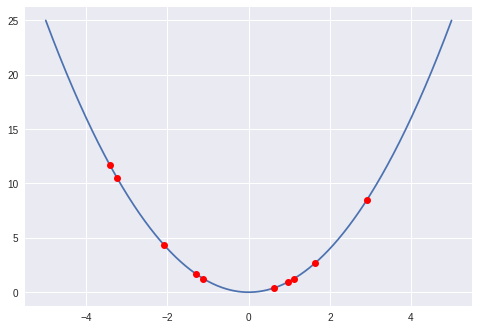

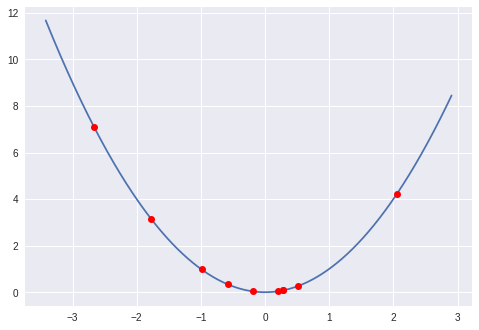

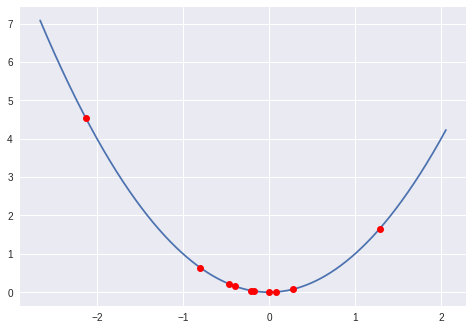

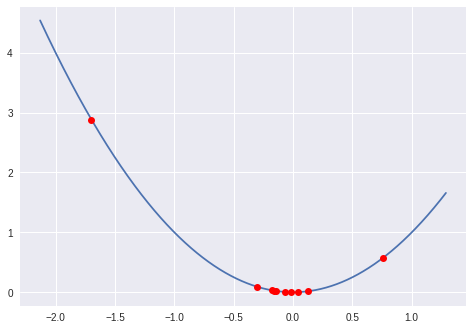

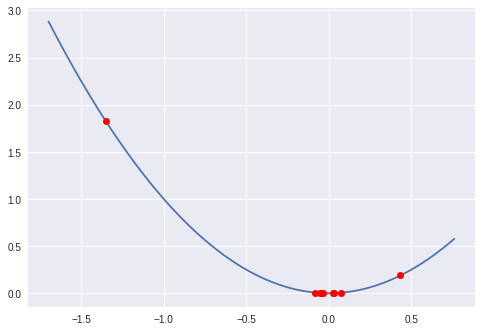

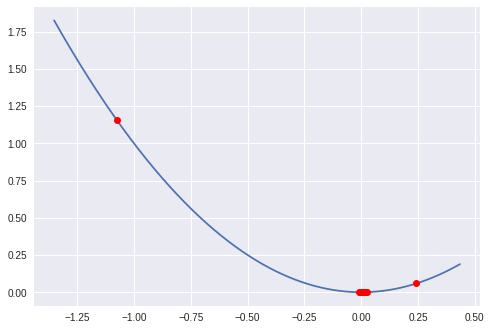

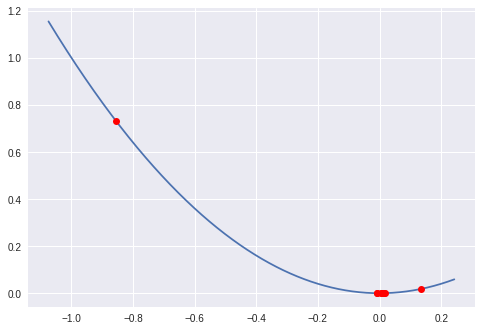

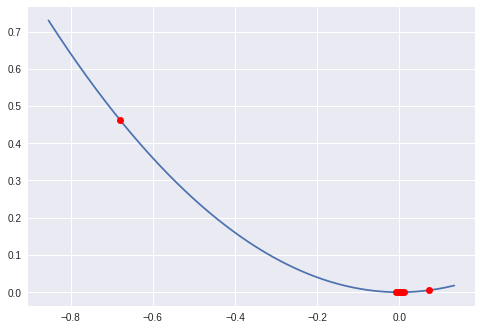

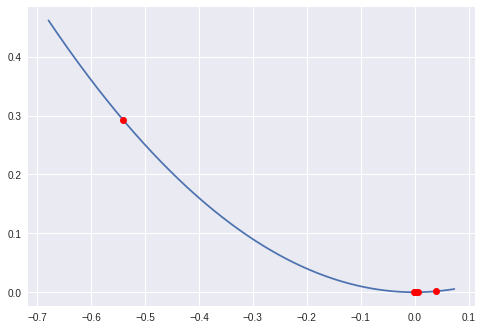

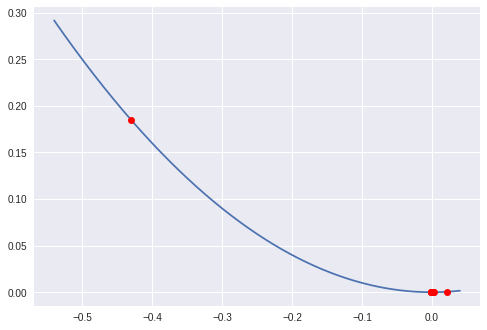

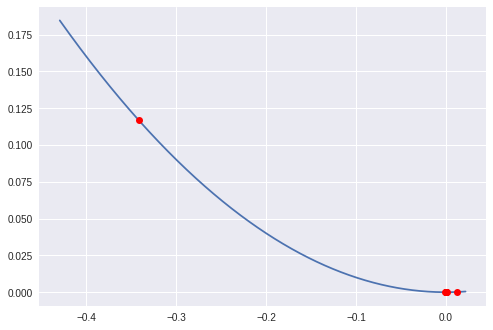

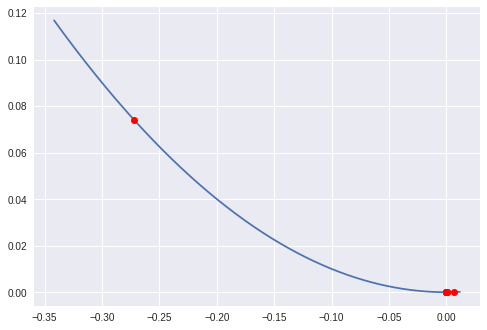

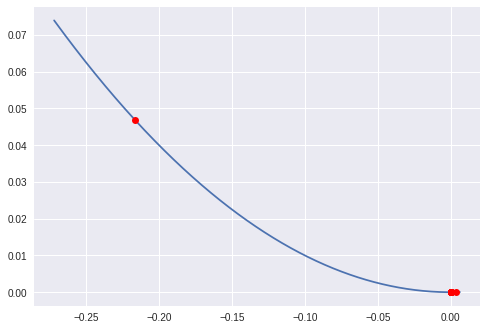

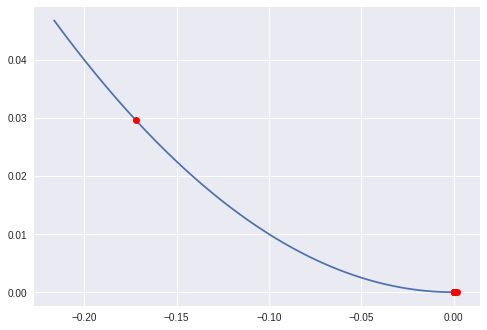

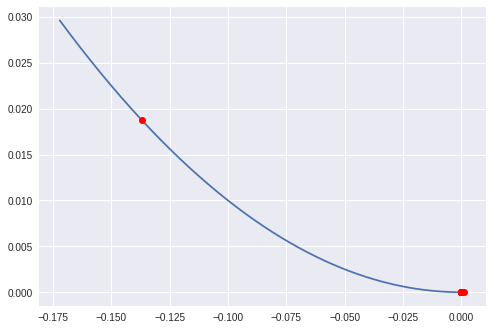

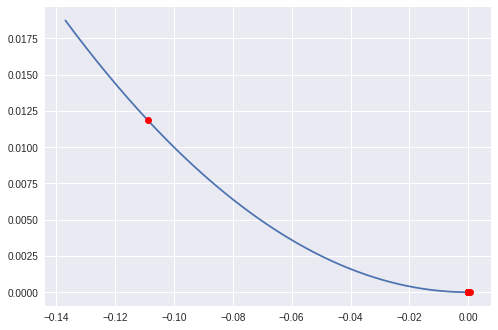

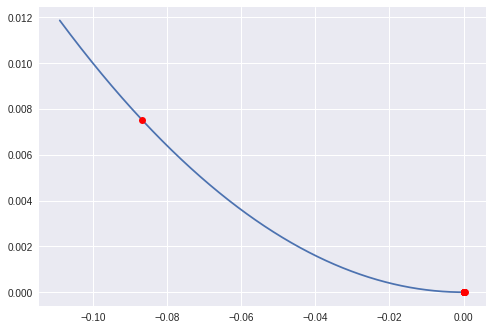

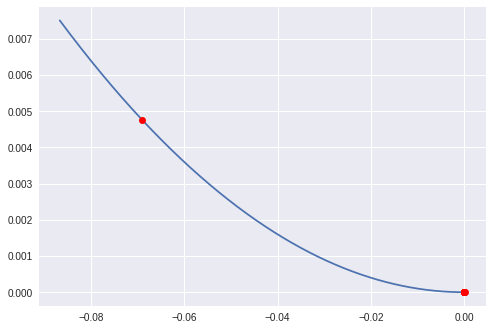

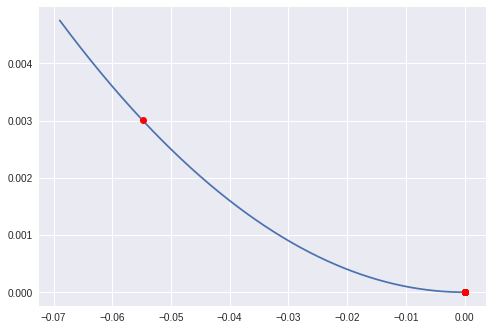

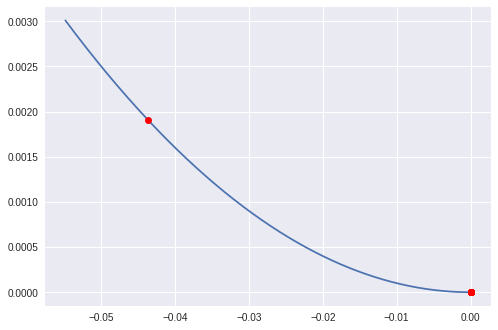

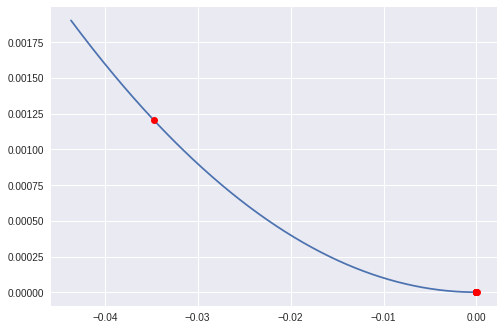

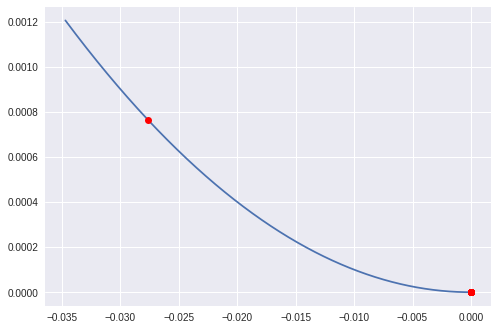

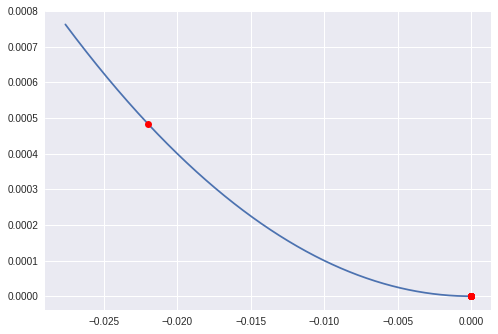

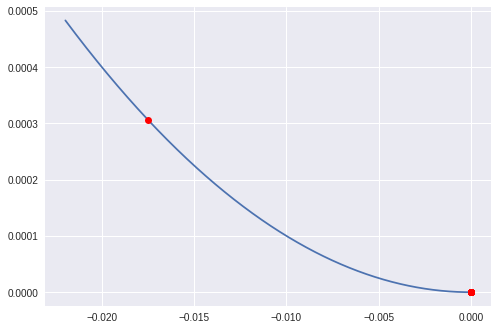

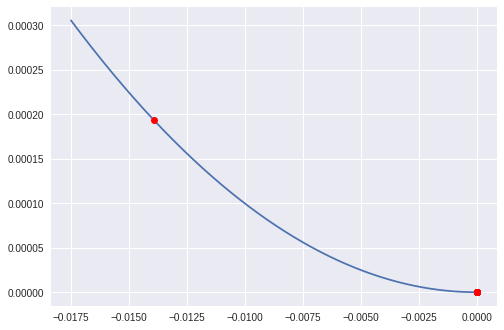

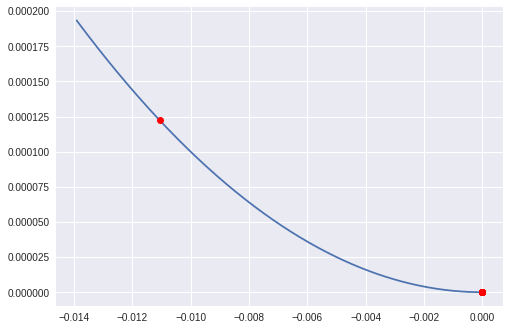

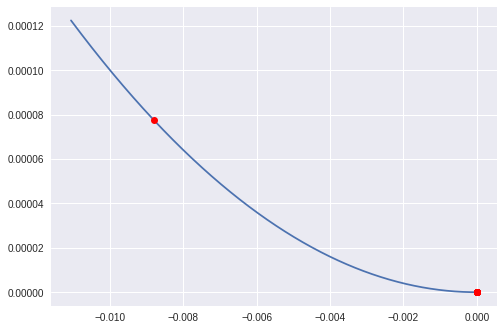

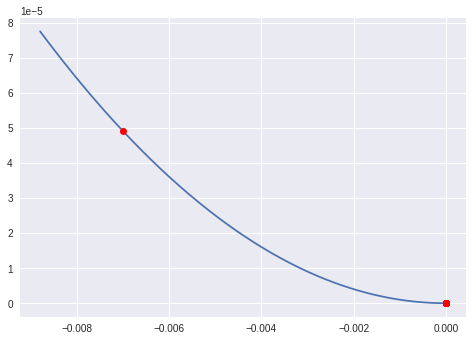

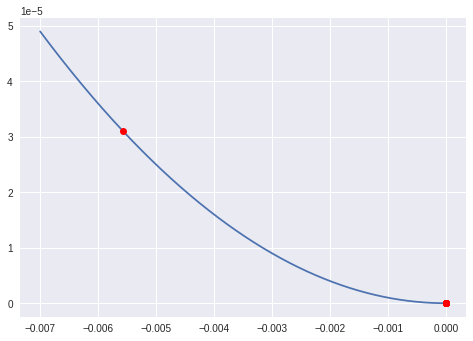

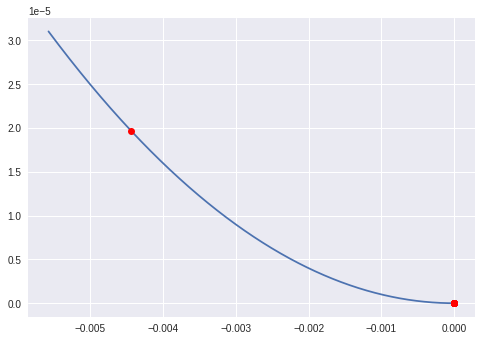

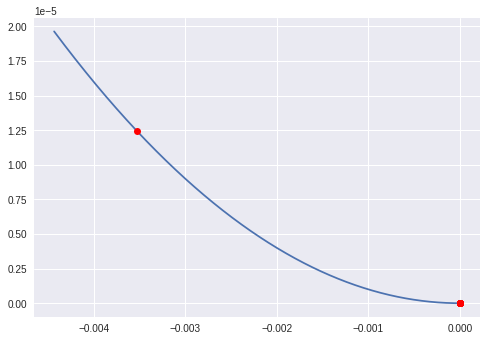

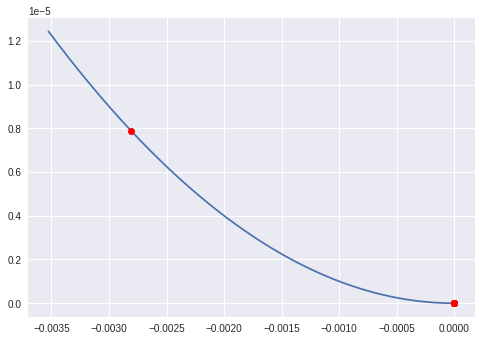

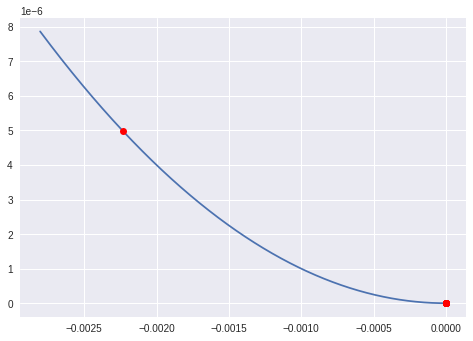

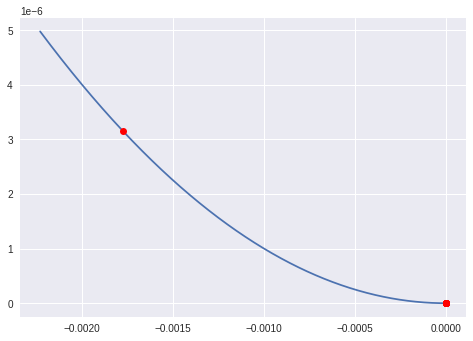

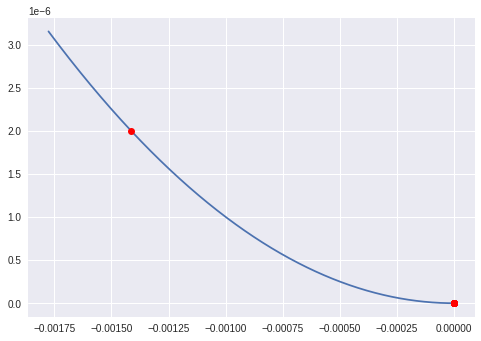

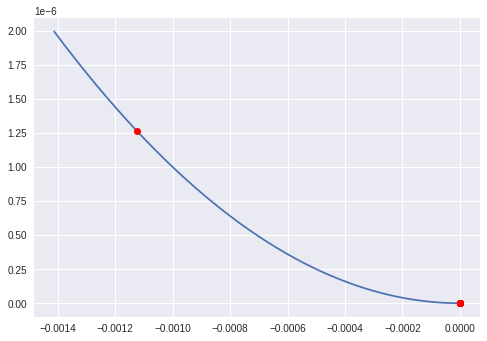

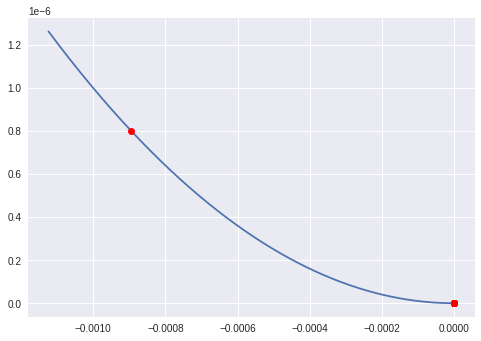

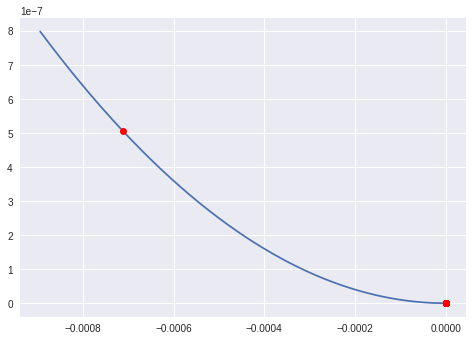

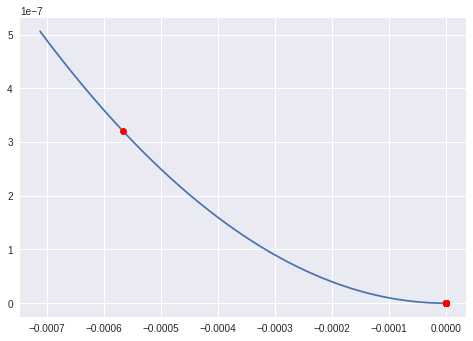

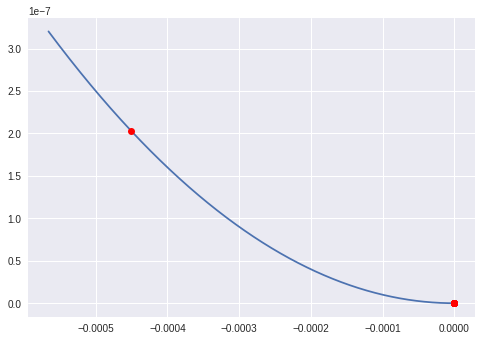

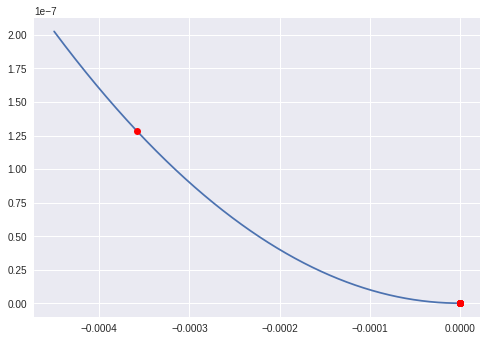

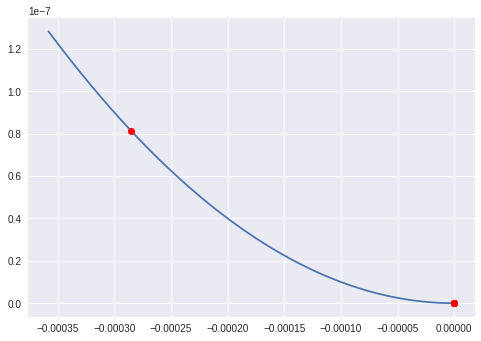

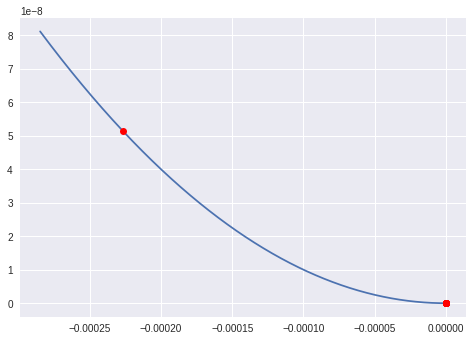

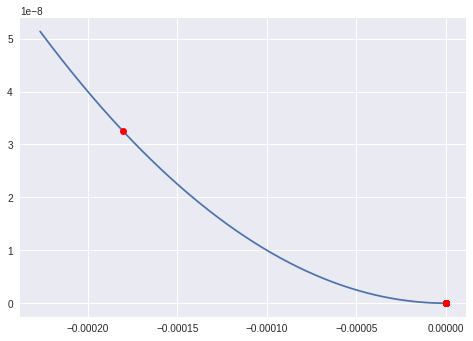

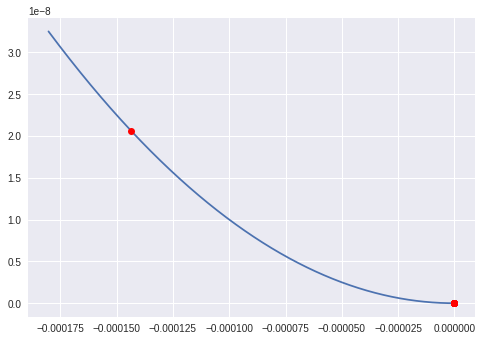

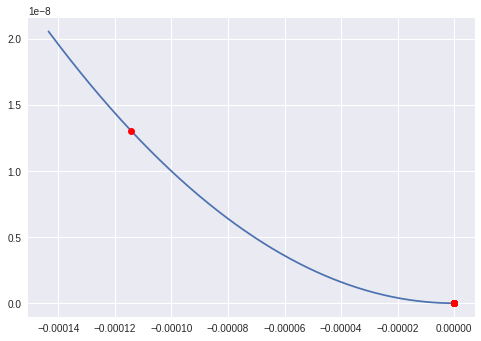

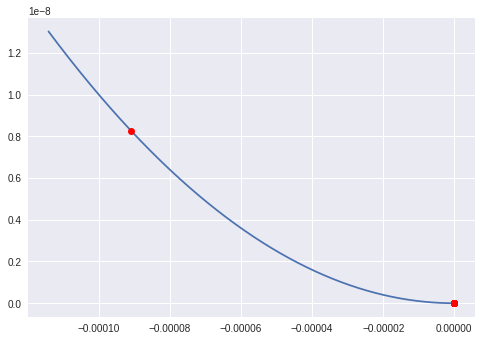

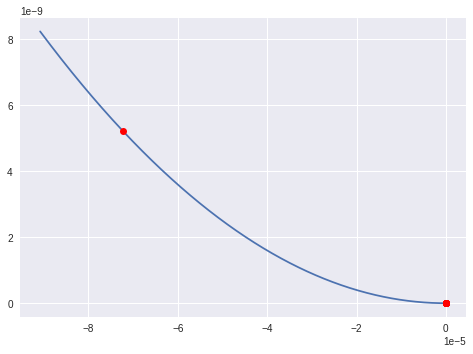

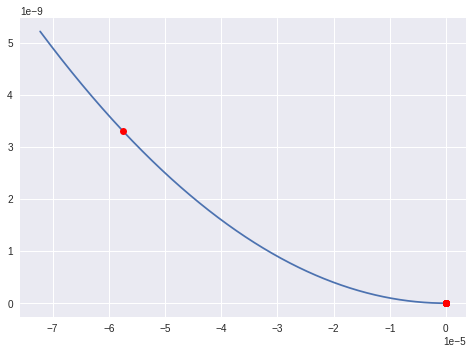

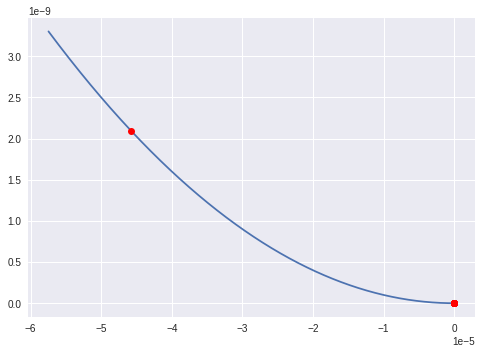

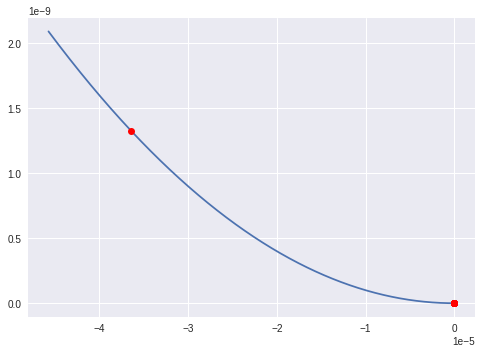

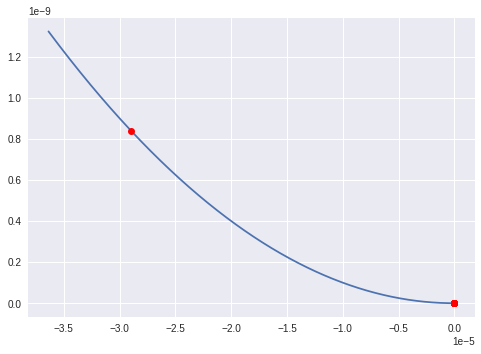

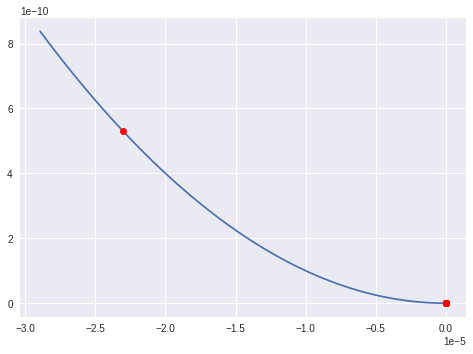

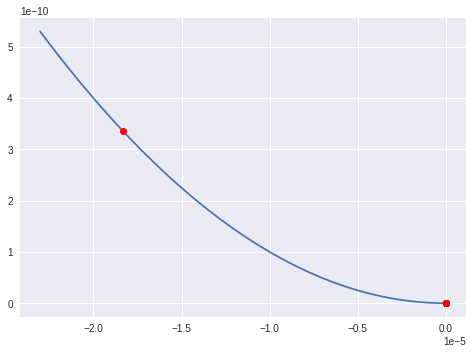

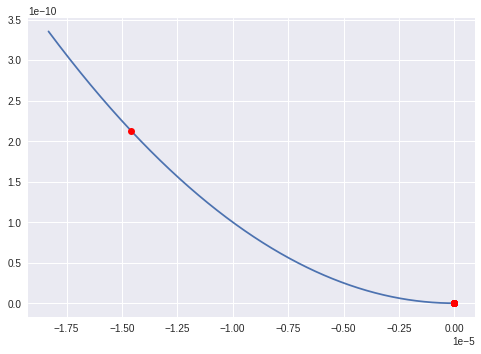

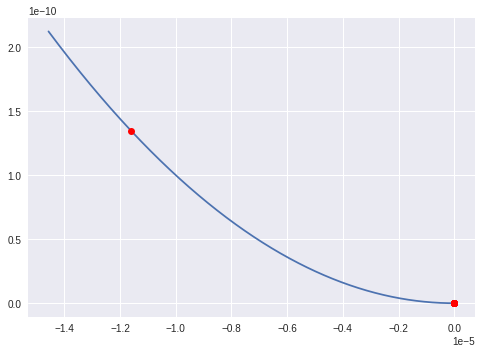

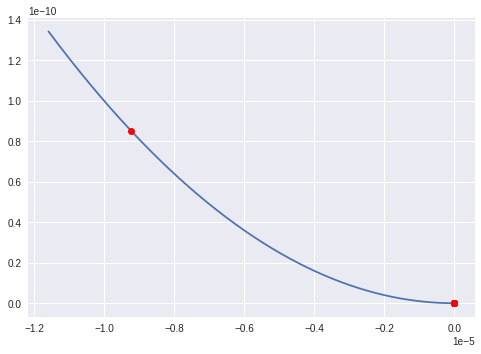

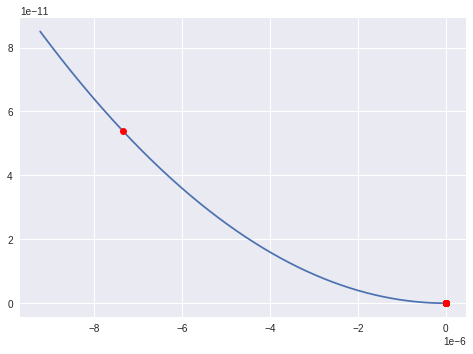

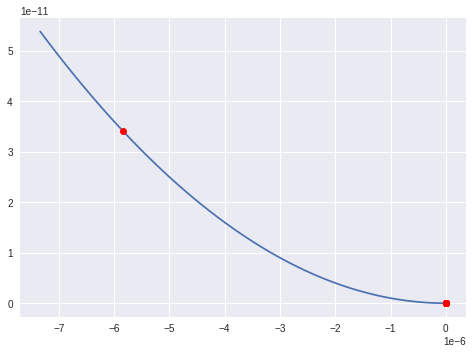

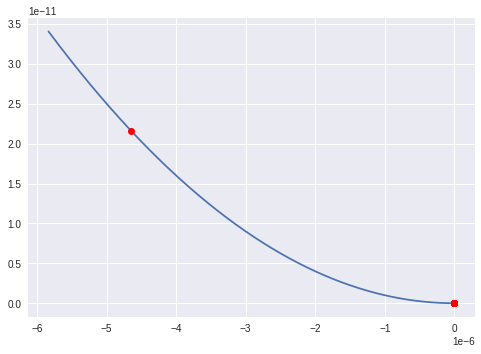

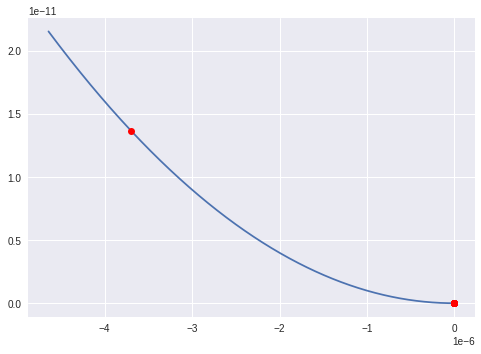

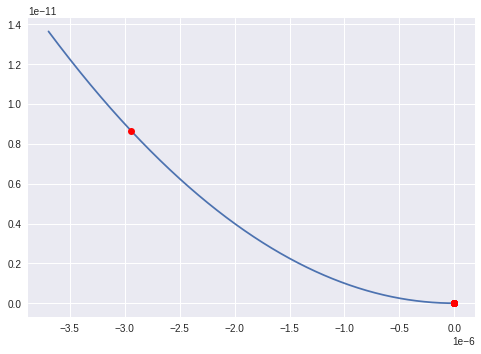

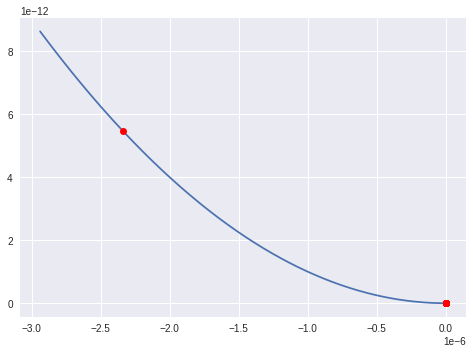

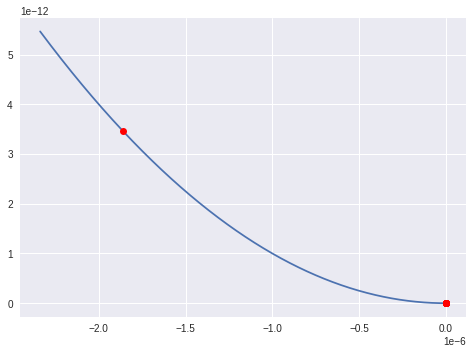

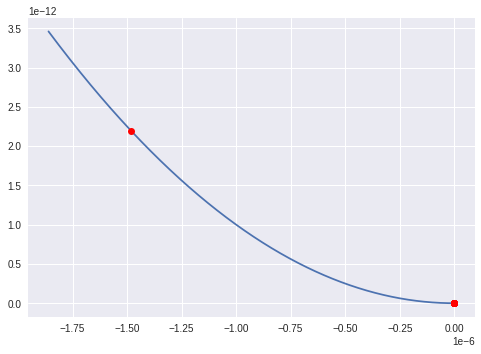

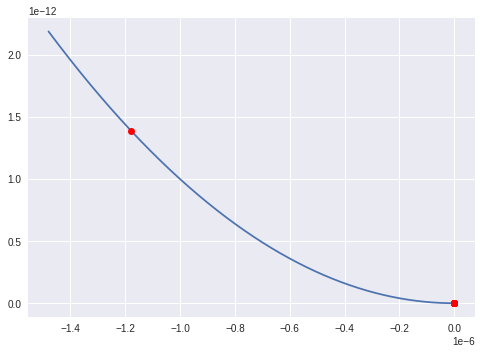

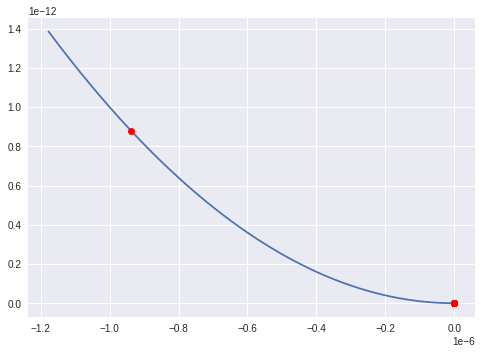

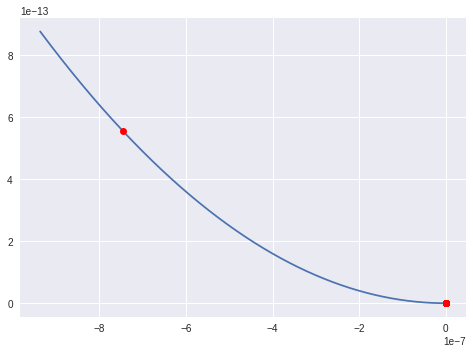

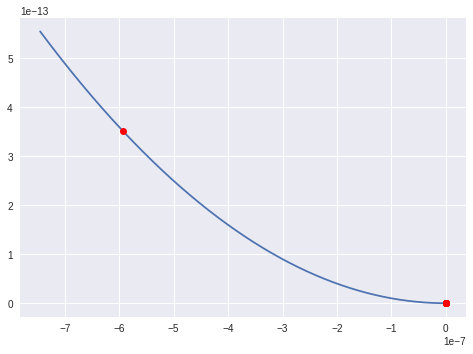

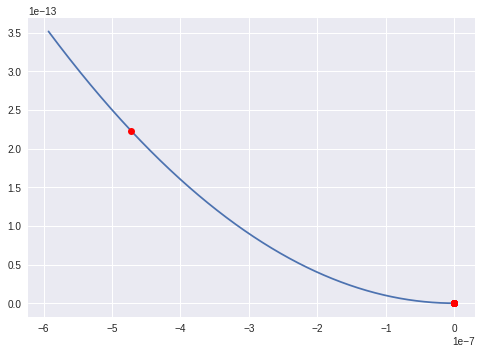

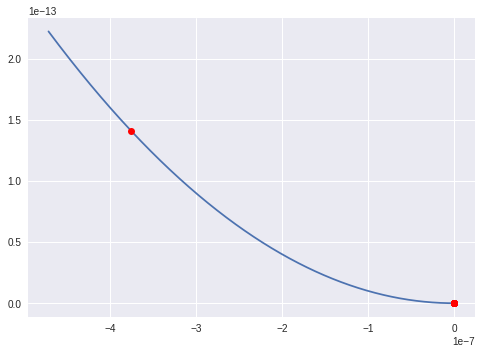

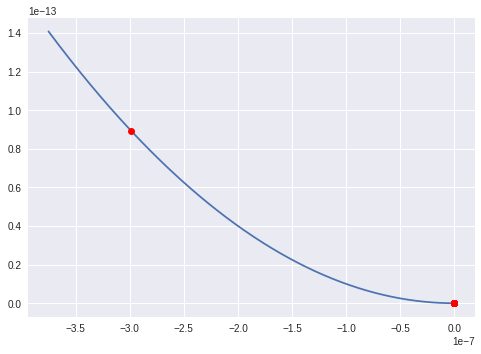

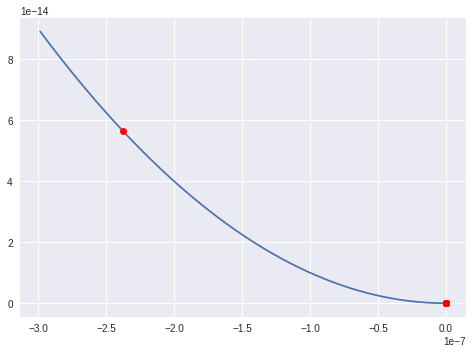

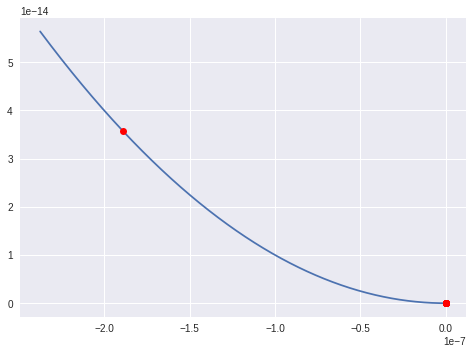

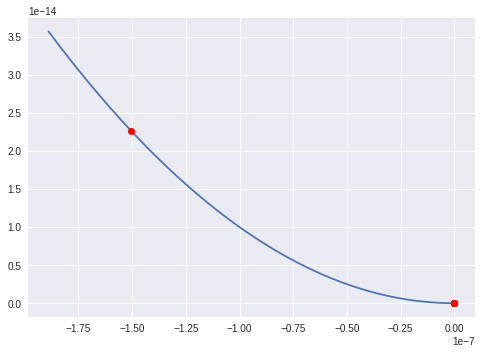

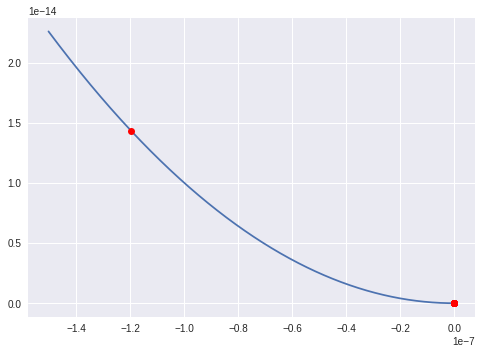

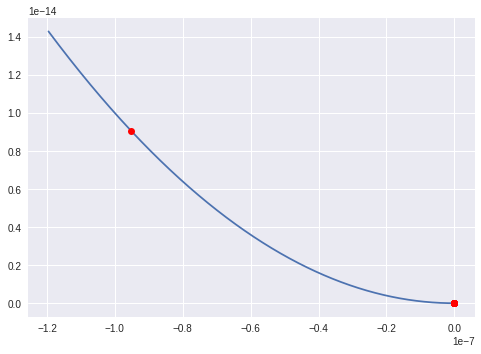

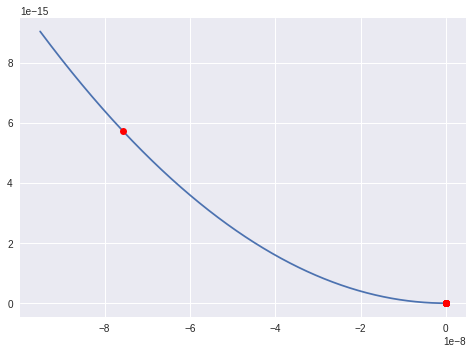

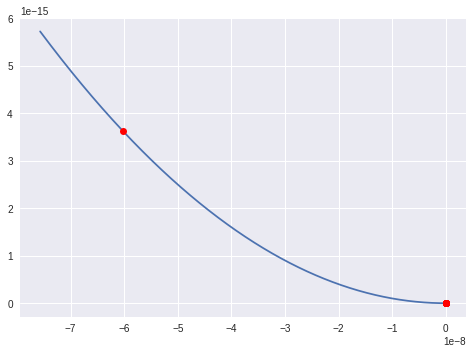

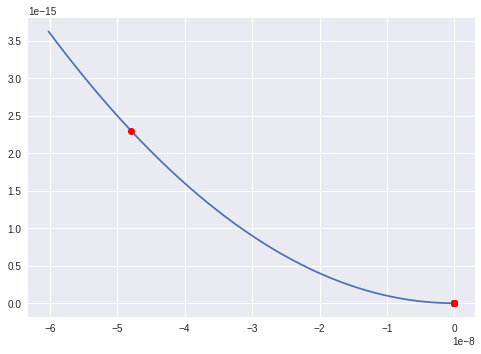

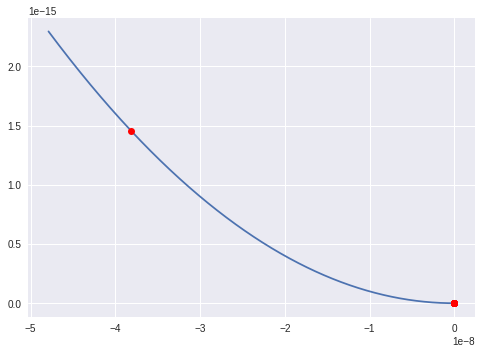

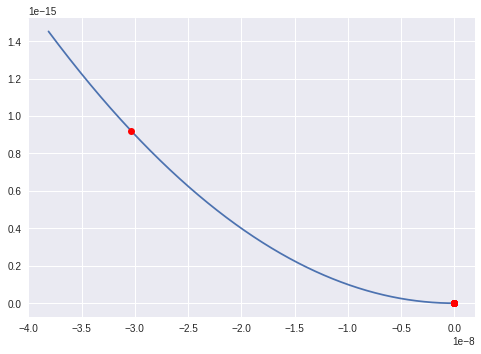

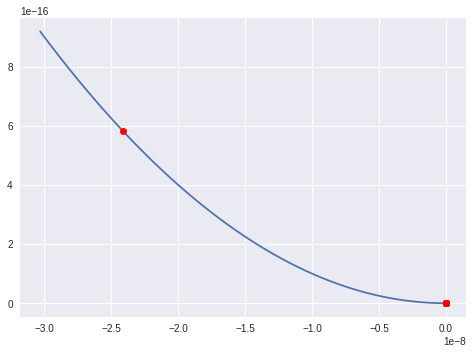

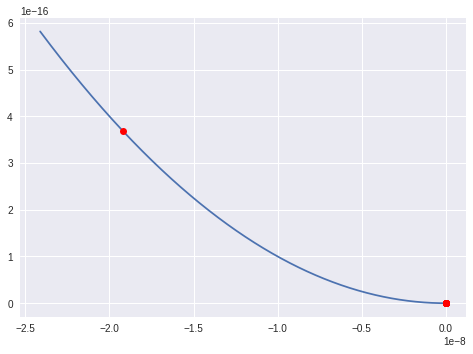

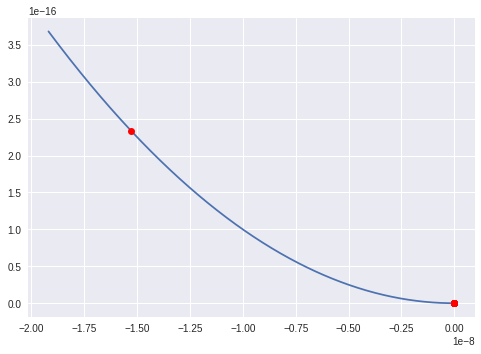

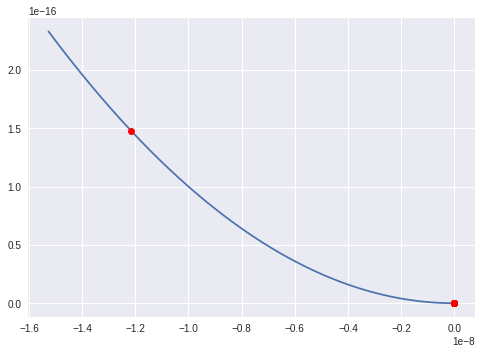

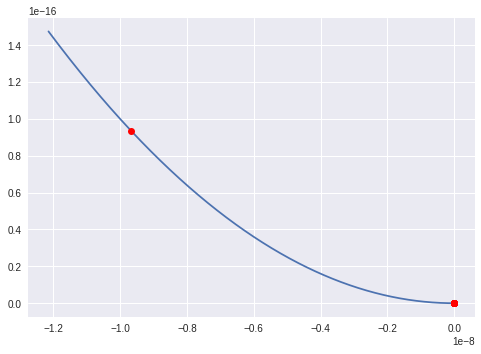

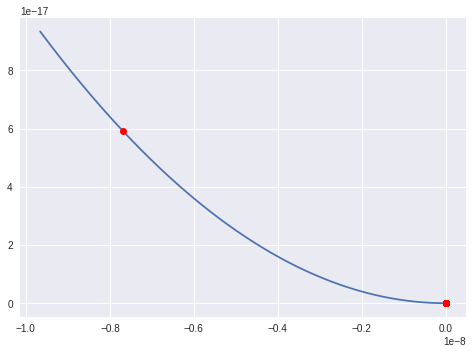

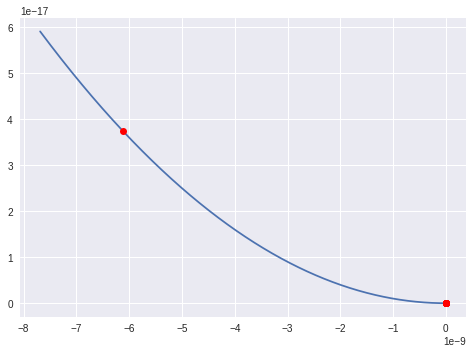

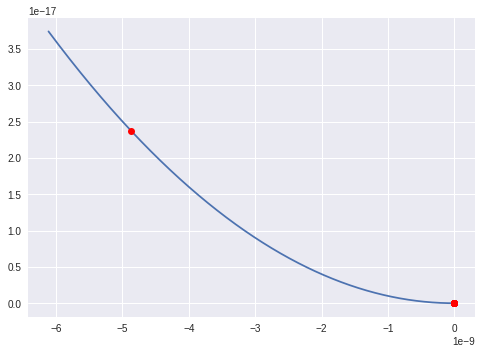

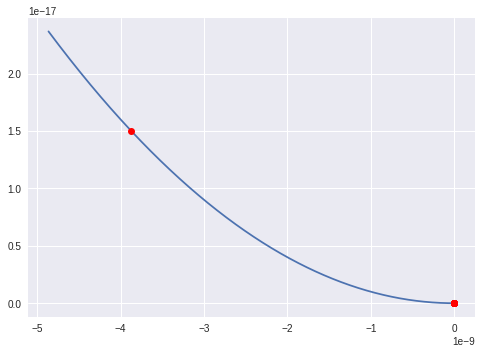

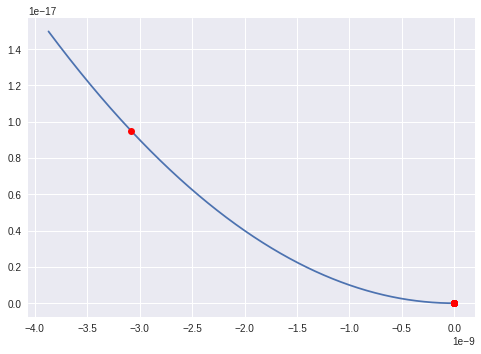

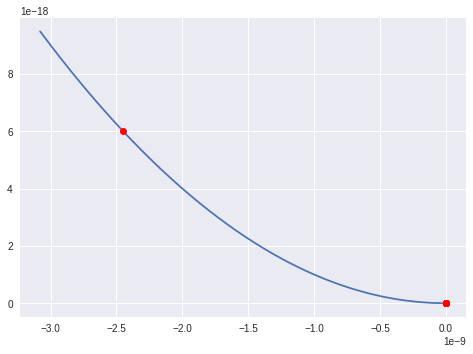

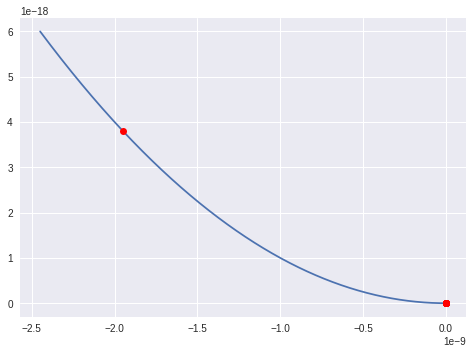

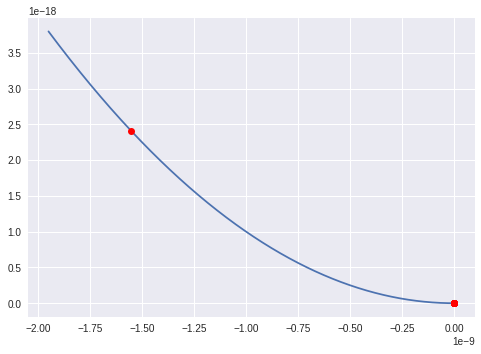

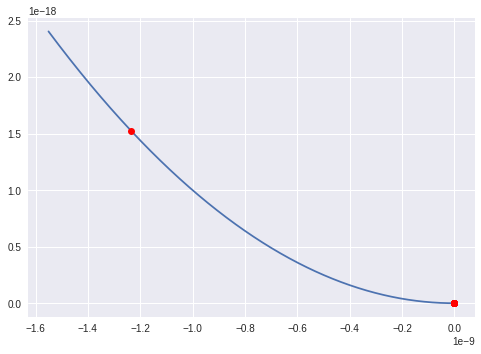

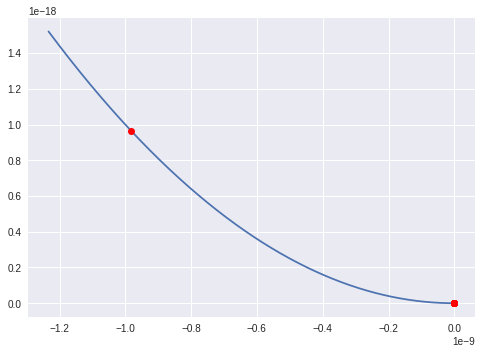

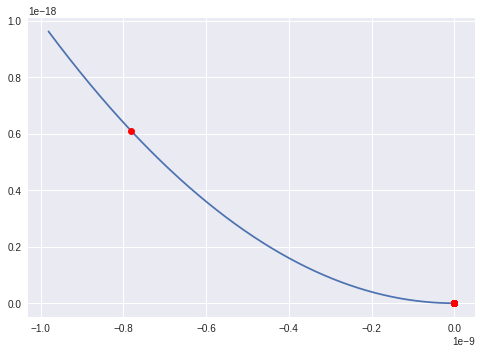

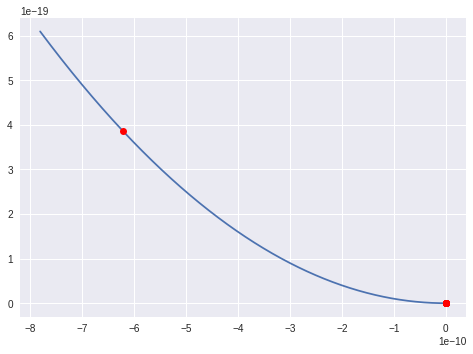

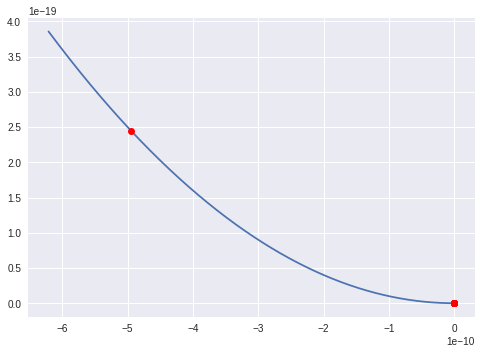

2.8887260514089038e-36 8.344738200088477e-72


In [64]:
import matplotlib.pyplot as plt
import numpy as np

swarn = []
best_global_pos = random.uniform(-5, 5) #We took it randomly
best_global_value = f(best_global_pos)  
#print(best_global_value)
for i in range(0, N): #Initialice a swarn of N birds.
    swarn.append(Bird())
    if f(swarn[i]._best) < best_global_value:
        best_global_value = f(swarn[i]._best)
        best_global_pos = swarn[i]._best

interval = (-5, 5);
for j in range(0, it):
    plt.style.use('seaborn')
    x = np.linspace(interval[0], interval[1], 1000)
    points = [f(s) for s in x]
    plt.plot(x, points)
    x_points = []
    for pio in swarn:
        pio.it(best_global_pos, inert, cog, soc)
        if (f(pio.pos) < f(pio._best)) :
            pio.update_best(pio.pos)
        if (f(pio._best) < best_global_value):
            best_global_pos = pio._best
            best_global_value = f(pio._best)
        x_points.append(pio.pos)
        plt.plot(pio.pos, f(pio.pos), 'ro')
    plt.show()
    interval = (min(x_points), max(x_points))






print(best_global_pos, best_global_value)


